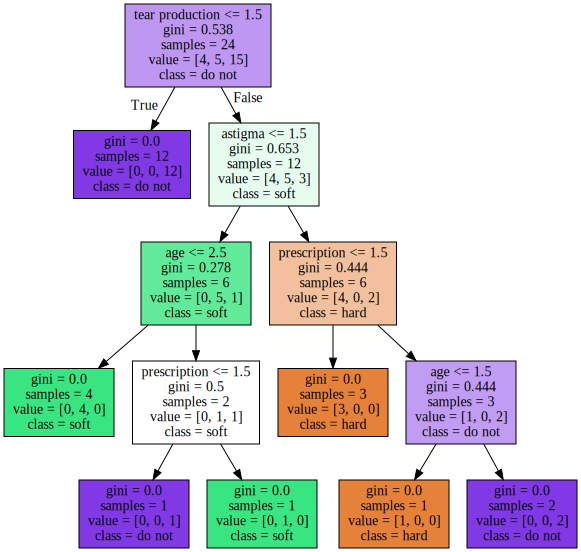

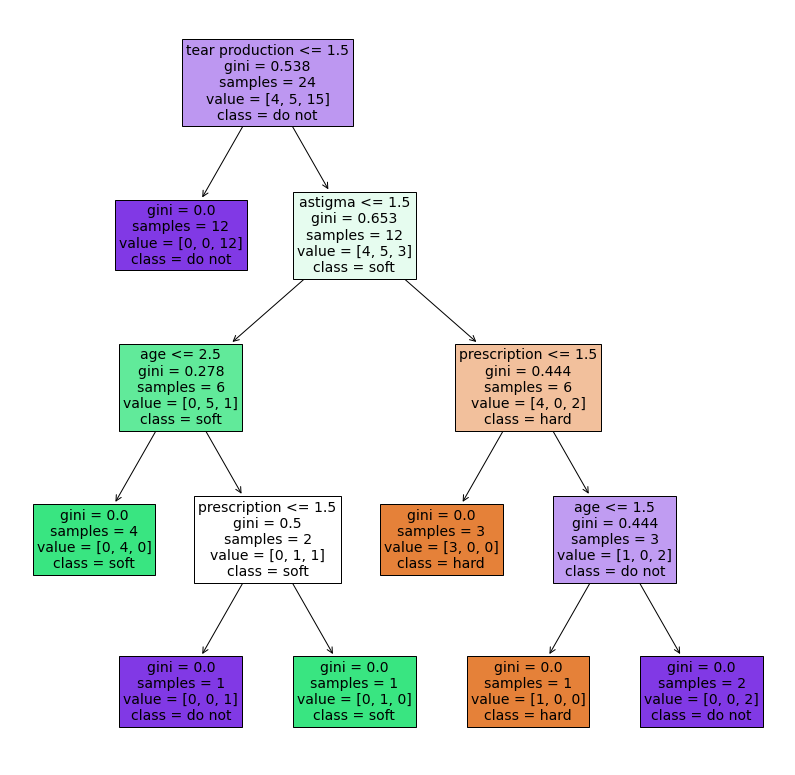

In [43]:
import pandas as pd
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

#get the datasets directly from UCI's website
url_train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data'
dataframe_train = (pd.read_csv(url_train, delim_whitespace=True, header=None, index_col=0))

#drop first column from train data since the first column has no useful information
#train_x is the training data and train_y is the class data
train_x = dataframe_train.drop(dataframe_train.columns[4], axis=1)
train_y = dataframe_train[5]
feature_cols = ['age', 'prescription', 'astigma', 'tear production']
target_names = ['hard', 'soft', 'do not']

#construct tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_x, train_y)

#visualize the tree using tree.plot_tree
fig = plt.figure(figsize=(14,14))
tree.plot_tree(clf, feature_names=feature_cols, class_names=target_names, filled=True, fontsize=14)
fig.savefig('plot_tree.png')

#visualize the tree using graphviz
dot_data = tree.export_graphviz(clf, feature_names=feature_cols, class_names=target_names, filled=True)
graph = graphviz.Source(dot_data, format='png')
graph.render("graphviz")
graph